In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

import warnings
warnings.simplefilter("ignore")

In [ ]:
#loading data
df = pd.read_csv('telco-customer-churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#checking for duplicates and null
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#getting mean value for total charges to replace with empty string ' '
count=0
sum=0
for i in df['TotalCharges']:
    if i.strip()!='':

        sum=sum+float(i)
        count= count+1

In [ ]:
#replacing empty string with mean value values and changing 'TotalCharges' datatype to 'numeric'
df['TotalCharges'] = df['TotalCharges'].replace(' ',sum/count )
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

Data is cleaned, no null/duplicate values found

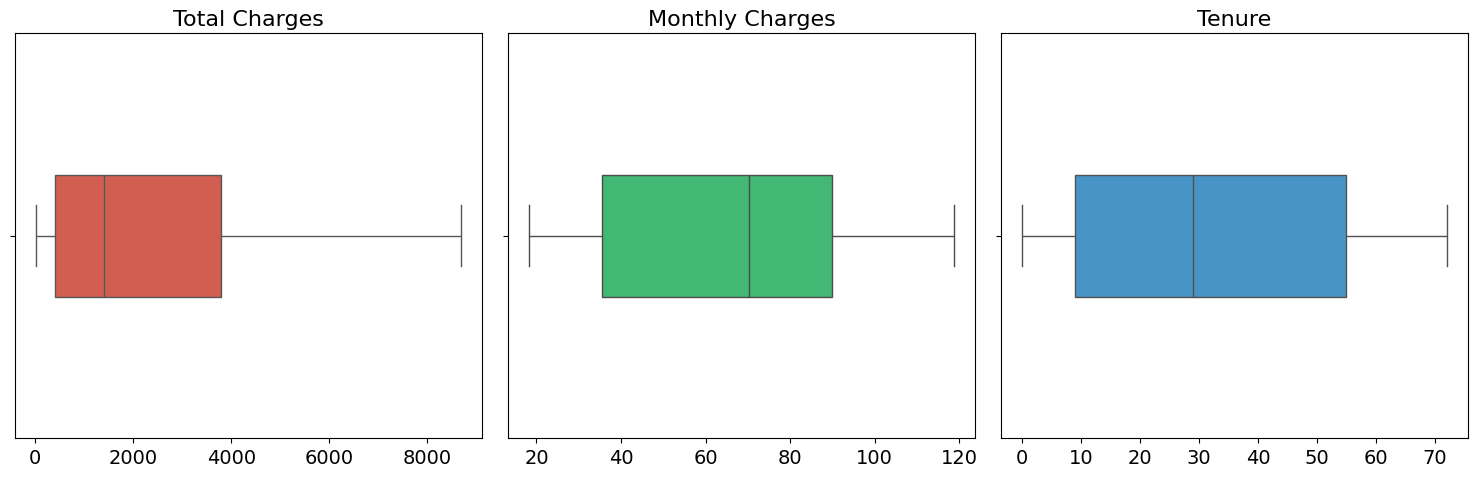

In [ ]:
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(ax=axes[0], data=df, x='TotalCharges', color='#e74c3c', width=0.3)
axes[0].set_title('Total Charges', fontsize=16)
axes[0].set_xlabel('')

sns.boxplot(ax=axes[1], data=df, x='MonthlyCharges', color='#2ecc71', width=0.3)
axes[1].set_title('Monthly Charges', fontsize=16)
axes[1].set_xlabel('')

sns.boxplot(ax=axes[2], data=df, x='tenure', color='#3498db', width=0.3)
axes[2].set_title('Tenure', fontsize=16)
axes[2].set_xlabel('')

for ax in axes:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

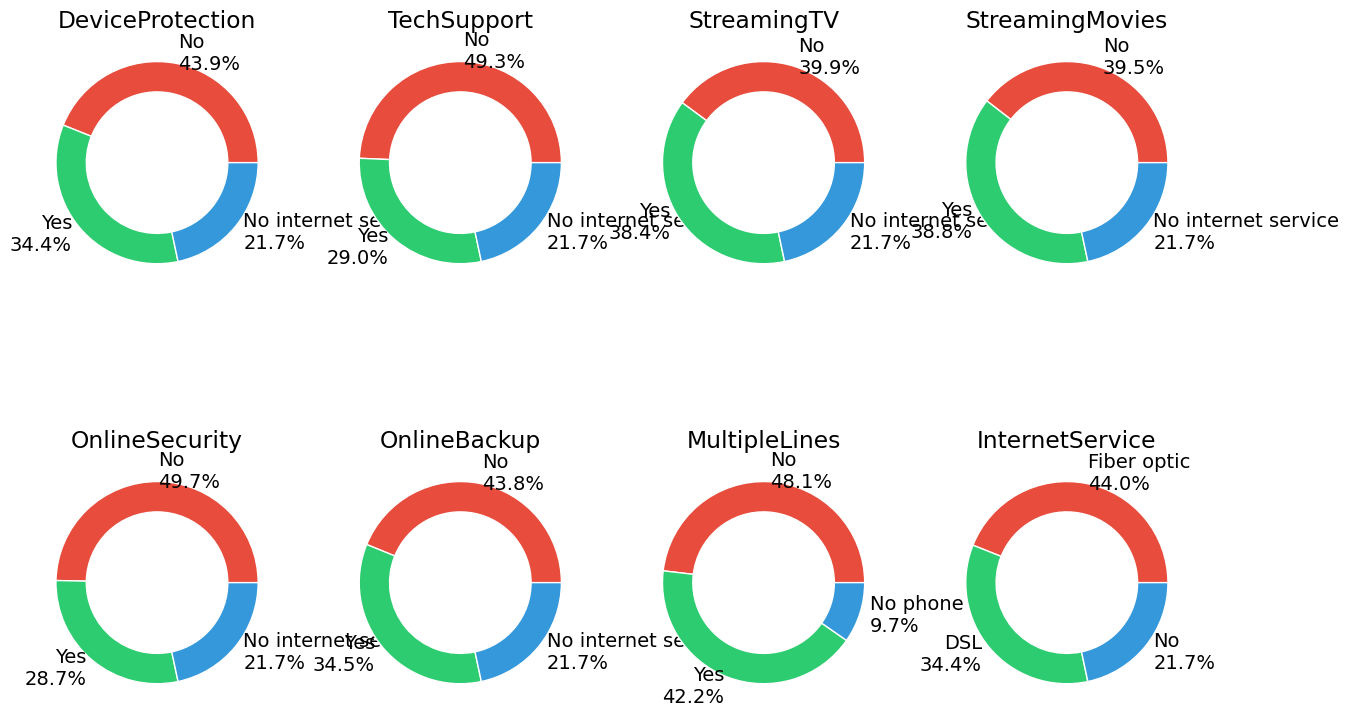

In [ ]:
#visualizing services
donuts = df[{'DeviceProtection': ['No', 'Yes', 'No internet service'],
        'TechSupport': ['No', 'Yes', 'No internet service'],
        'StreamingTV': ['No', 'Yes', 'No internet service'],
        'StreamingMovies': ['No', 'Yes', 'No internet service'],
        'OnlineSecurity': ['No', 'Yes', 'No internet service'],
        'OnlineBackup': ['No', 'Yes', 'No internet service'],
        'MultipleLines': ['No', 'Yes', 'No phone service'],
        'InternetService': ['Fiber optic', 'DSL', 'No'],
        }]
donut = pd.DataFrame(donuts)

def plot_donut(ax, labels, sizes, title):
    center_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(center_circle)
    ax.pie(sizes, labels=[f"{l}\n{v:0.1f}%" for l, v in zip(labels, sizes)], colors=['#e74c3c','#2ecc71','#3498db'], wedgeprops=dict(width=0.3, edgecolor='white'), autopct='')
    ax.add_artist(plt.Circle((0,0),0.5,fc='white'))
    ax.set_title(title)

fig, axes = plt.subplots(2,4, figsize=(15,10))

for i, col in enumerate(donut.columns):
    values = donut[col].value_counts().values
    labels = donut[col].value_counts().index.tolist()
    total_count = np.sum(values)
    sizes = [value/total_count*100 for value in values]
    plot_donut(axes[i//4,i%4], labels, sizes, col)

plt.rcParams['font.size'] = 9
plt.tight_layout
plt.show()


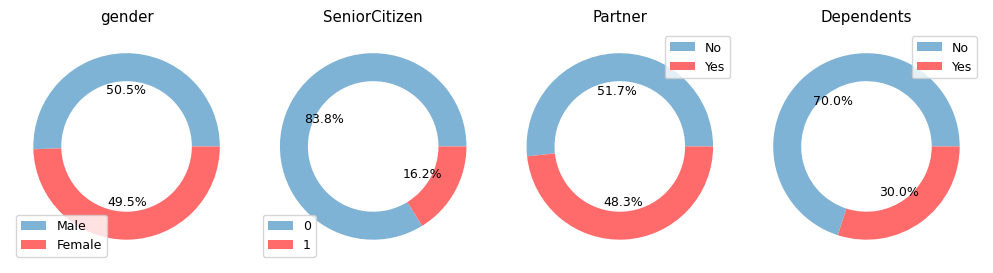

In [ ]:
#demographics
colors = ['#7FB3D5','#FF6B6B']
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

for i, var in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
    ax = axes[i]
    counts = df[var].value_counts()
    ax.pie(counts, colors=colors, wedgeprops=dict(width=0.3), autopct='%1.1f%%')
    ax.set_title(var)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend(counts.index.tolist(), loc="best")


plt.tight_layout()
plt.show()


In [ ]:
#configs
mapping_list = {'gender':{'male':'0','female':'1'},
                'Partner': {'yes': '1', 'no': '0'},
                'Dependents': {'yes': '1', 'no': '0'},
                'PhoneService': {'yes': '1', 'no': '0'},
                'PaperlessBilling': {'yes': '1', 'no': '0'},
                'Churn': {'yes': '1', 'no': '0'},
                'OnlineSecurity': {'yes': '1', 'no': '0', 'no internet service': '2'},
                'OnlineBackup': {'yes': '1', 'no': '0', 'no internet service': '2'},
                'DeviceProtection': {'yes': '1', 'no': '0', 'no internet service': '2'},
                'TechSupport': {'yes': '1', 'no': '0', 'no internet service': '2'},
                'StreamingTV': {'yes': '1', 'no': '0', 'no internet service': '2'},
                'StreamingMovies': {'yes': '1', 'no': '0', 'no internet service': '2'},
                'MultipleLines': {'yes': '1', 'no': '0', 'no phone service': '2'},
                'InternetService': {'dsl': '1', 'no': '0', 'fiber optic': '2'},
                'Contract': {'one year': '1', 'month-to-month': '0', 'two year': '2'},
                'PaymentMethod': {'electronic check': '1', 'mailed check': '0', 'bank transfer (automatic)': '2',
                                  'credit card (automatic)': 3}
               }

def update_cols_vals(dataframe,column_list,update_list=['yes','no'],update_values=['1','0']):
    """
    updates the column values in the column  to the values passed in the update_values list.
    Params:
        pandas dataframe :  dataframe - input dataframe
        list :  list of column whose values are to be converted
        list :  field values that are to be converted
        list :  converted field values
    Returns:
        pandas dataframe :  dataframe - values converted dataframe
    """
    for column in column_list:
        dataframe[column] = dataframe[column].str.lower().replace(to_replace = update_list,value = update_values)

    return dataframe



In [ ]:
df_transformed = df.copy()
#converting all the fields values to numeric values
for cals,values in mapping_list.items():
    old_list=[]
    update_list = []
    for old_val,update_val in values.items():
        old_list.append(old_val)
        update_list.append(update_val)
    df_transformed = update_cols_vals(df_transformed,[cals],update_list=old_list,update_values=update_list)

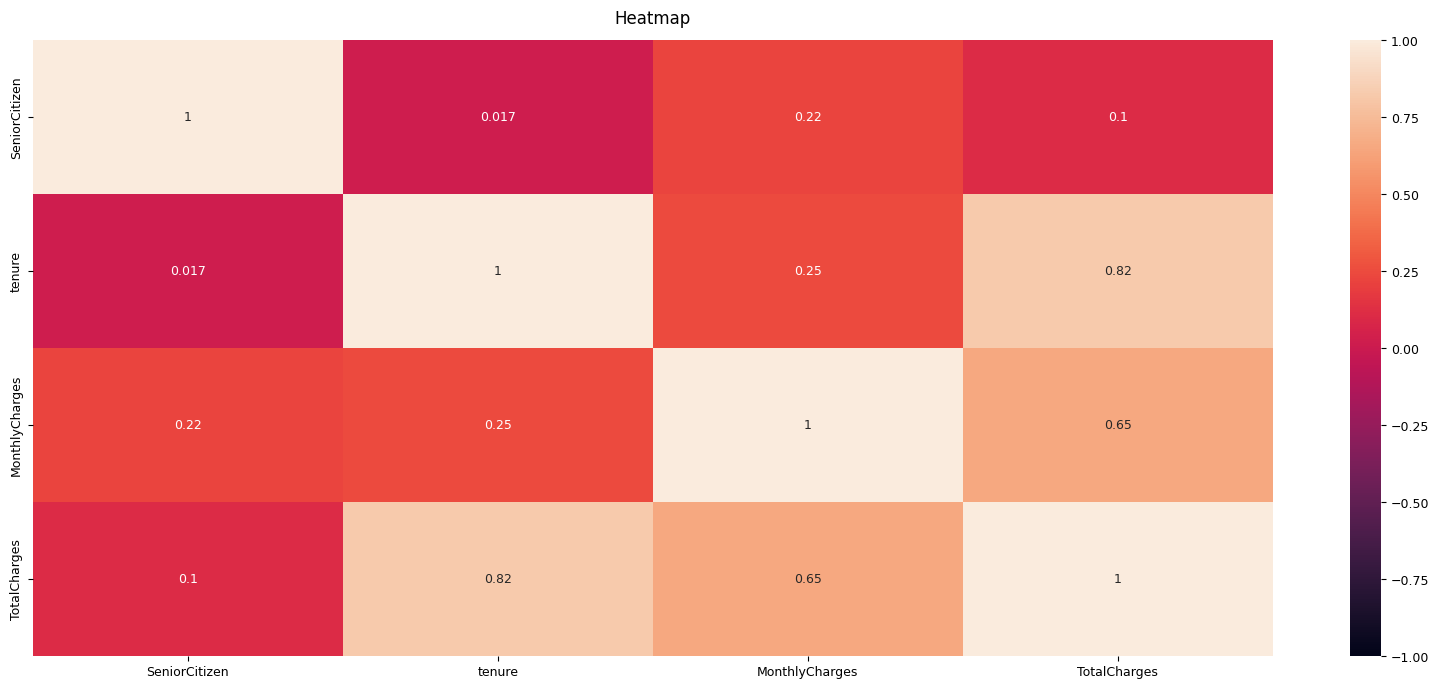

In [ ]:
#plotting the heat map
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df_transformed.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':12}, pad=12);

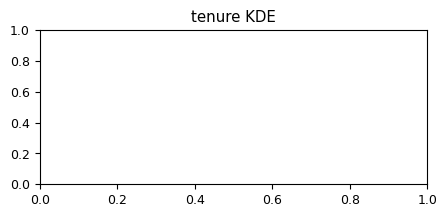

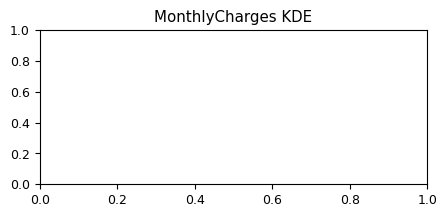

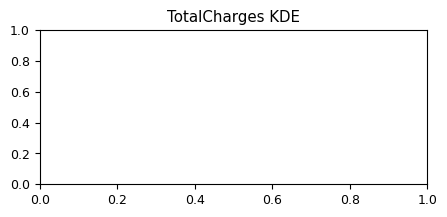

In [ ]:
#KDE Plots

for i in ['tenure','MonthlyCharges','TotalCharges']:
    plt.figure(figsize=(5,2))
    plt.title(f"{i} KDE")
    sns.kdeplot(df_transformed[df_transformed['Churn'] == 0][i],color = 'orange')
    sns.kdeplot(df_transformed[df_transformed['Churn'] == 1][i],color = 'red')

In [ ]:
# check unique values of each column
for column in df_transformed.columns:
    print(f'Column: {column} - Unique Values: {df_transformed[column].unique()}')

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['1' '0']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['1' '0']
Column: Dependents - Unique Values: ['0' '1']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['0' '1']
Column: MultipleLines - Unique Values: ['2' '0' '1']
Column: InternetService - Unique Values: ['1' '2' '0']
Column: OnlineSecurity - Unique Values: ['0' '1' '2']
Column: OnlineBackup - Unique Values: ['1' '0' '2']
Column: DeviceProtection - Unique Values: ['0' '1' '2']
Column: TechSupport - Unique Values: ['0' '1' '2']
Column: StreamingTV - Unique Values: ['0' '1' '2']
Column: StreamingMovies - U

In [ ]:
def convert_toint(dataframe):
    """
    converts object data type of the column in the data frame to int.
    Params:
        pandas dataframe :  dataframe - input dataframe
    Returns:
        pandas dataframe :  dataframe - datatype converted dataframe
    """
    for column,data_type in dataframe.dtypes.iteritems():
        if data_type in ['object']:
            dataframe[column] = dataframe[column].astype('int64')
    return dataframe

In [ ]:
df_transformed.drop(columns='customerID', inplace=True)

In [ ]:
df_transformed['TotalCharges'] = pd.to_numeric(df_transformed['TotalCharges'], errors='coerce')
df_transformed = convert_toint(df_transformed)

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df_churn = df_transformed['Churn']
df_no_churn = df_transformed.drop('Churn', axis=1)


df_nochurn_train,df_nochurn_test, df_churn_train, df_churn_test = train_test_split(df_no_churn, df_churn, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(df_nochurn_train, df_churn_train)
predict_naive = classifier.predict(df_nochurn_test)

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,predict_naive,'GaussianNB No SMOTE')

NameError: name 'get_metrics' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression().fit(df_nochurn_train, df_churn_train)
logisticReg_perdict = logisticReg.predict(df_nochurn_test)

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,logisticReg_perdict,'LogisticRegression No SMOTE')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(df_nochurn_train, df_churn_train)
randomForest_predict = regressor.predict(df_nochurn_test)

NameError: name 'df_nochurn_train' is not defined

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,randomForest_predict,'RandomForestClassifier No SMOTE')

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier()
xg_reg.fit(df_nochurn_train, df_churn_train)
xg_pred = xg_reg.predict(df_nochurn_test)

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,xg_pred,'XGBoost No SMOTE')

# SMOTE

In [ ]:
#balancing the imbalance data using SMOTE
from imblearn.over_sampling import SMOTE
s_df_nochurn, s_df_churn = SMOTE().fit_resample(df_no_churn, df_churn)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
s_df_nochurn = s_sc.fit_transform(s_df_nochurn)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

df_nochurn_train,df_nochurn_test, df_churn_train, df_churn_test = train_test_split(s_df_nochurn, s_df_churn, test_size=0.2, random_state=42)

In [ ]:

df_metrix = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1-Score'])
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_metrics(df,df_test,predict,model_name):
    # Evaluate the performance of the classifier
    accuracy = accuracy_score(df_test,predict)
    precision = precision_score(df_test,predict)
    recall = recall_score(df_test,predict)
    f1 = f1_score(df_test,predict)

    # Print the performance metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    d2 = pd.DataFrame([{'Model':model_name,'Accuracy':accuracy, 'Precision':precision,'Recall':recall, 'F1-Score':f1}])
    df = pd.concat([df,d2],ignore_index=True)
    return df

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(df_nochurn_train, df_churn_train)
predict_naive = classifier.predict(df_nochurn_test)

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,predict_naive,'GaussianNB')

Accuracy: 0.7811594202898551
Precision: 0.7458745874587459
Recall: 0.8617731172545281
F1-Score: 0.7996461742591774


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression().fit(df_nochurn_train, df_churn_train)
logisticReg_perdict = logisticReg.predict(df_nochurn_test)

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,logisticReg_perdict,'LogisticRegression')

Accuracy: 0.8082125603864734
Precision: 0.7864674868189807
Recall: 0.8531935176358436
F1-Score: 0.8184727937814358


In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(df_nochurn_train, df_churn_train)
randomForest_predict = regressor.predict(df_nochurn_test)

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,randomForest_predict,'RandomForestClassifier')

Accuracy: 0.8333333333333334
Precision: 0.8346007604562737
Recall: 0.8369876072449952
F1-Score: 0.8357924797715374


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier()
xg_reg.fit(df_nochurn_train, df_churn_train)
xg_pred = xg_reg.predict(df_nochurn_test)

In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,xg_pred,'XGBoost')

Accuracy: 0.8492753623188406
Precision: 0.840258541089566
Recall: 0.8674928503336511
F1-Score: 0.8536585365853658


In [ ]:
df_metrix

,Model,Accuracy,Precision,Recall,F1-Score
0,GaussianNB,0.781159,0.745875,0.861773,0.799646
1,LogisticRegression,0.808213,0.786467,0.853194,0.818473
2,RandomForestClassifier,0.833333,0.834601,0.836988,0.835792
3,XGBoost,0.849275,0.840259,0.867493,0.853659


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=10)}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

grid_search.fit(df_nochurn_train, df_churn_train)

# predict_naive = grid_search.predict(df_nochurn_test)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='recall')

In [ ]:
predict_naive = grid_search.predict(df_nochurn_test)

In [ ]:
# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'var_smoothing': 1.0}
Best accuracy:  0.9052121212121212


In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,predict_naive,'GaussianNB Tunned')

Accuracy: 0.7497584541062802
Precision: 0.6928104575163399
Recall: 0.909437559580553
F1-Score: 0.786479802143446


In [ ]:
param_grid = {
    "bootstrap": [True],
    "max_depth": [80, 90, 100, 110],
    "max_features": [2, 3],
    "min_samples_leaf": [3, 4, 5],
    "min_samples_split": [8, 10, 12],
    "n_estimators": [100, 200, 300, 1000]
}
rf_reg = RandomForestClassifier()

s_randomForest_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

s_randomForest_tuned.fit(df_nochurn_train, df_churn_train)
# randomForest_predict = s_randomForest_tuned.predict(df_nochurn_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
randomForest_predict = s_randomForest_tuned.predict(df_nochurn_test)

In [ ]:
# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", s_randomForest_tuned.best_params_)
print("Best accuracy: ", s_randomForest_tuned.best_score_)

Best hyperparameters:  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best accuracy:  0.8303942477233052


In [ ]:
df_metrix = get_metrics(df_metrix,df_churn_test,randomForest_predict,'RandomForestClassifier Tunned')

Accuracy: 0.8333333333333334
Precision: 0.8211678832116789
Recall: 0.8579599618684461
F1-Score: 0.8391608391608392


In [ ]:

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

xgb_model = xgb.XGBClassifier()

xg_reg_tuned = GridSearchCV(estimator = xgb_model,
                       param_grid = param_tuning,
                       cv = 5,
                       n_jobs = -1,
                       verbose = 1)

xg_reg_tuned.fit(df_nochurn_train, df_churn_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             verbose=1)

In [ ]:
xg_pred = xg_reg_tuned.predict(df_nochurn_test)
df_metrix = get_metrics(df_metrix,df_churn_test,xg_pred,'XGBoost Tuned')

Accuracy: 0.8463768115942029
Precision: 0.8393686165273909
Recall: 0.8617731172545281
F1-Score: 0.8504233301975541


In [ ]:
# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", xg_reg_tuned.best_params_)
print("Best accuracy: ", xg_reg_tuned.best_score_)

Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}
Best accuracy:  0.8444074463271889


In [ ]:
# Define the hyperparameters to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': [  'l1', 'l2', 'elasticnet', 'none'],
              'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# Fit the GridSearchCV object to the data
grid_search.fit(df_nochurn_train, df_churn_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [ ]:
grid_search_pred = grid_search.predict(df_nochurn_test)
df_metrix = get_metrics(df_metrix,df_churn_test,grid_search_pred,'LogisticRegression Tuned')

Accuracy: 0.8101449275362319
Precision: 0.787215411558669
Recall: 0.8570066730219257
F1-Score: 0.8206298493838431


In [ ]:
# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy:  0.7982613074127589


In [ ]:
df_metrix.sort_values(by=['Model'])

,Model,Accuracy,Precision,Recall,F1-Score
0,GaussianNB,0.781159,0.745875,0.861773,0.799646
4,GaussianNB Tunned,0.749758,0.692810,0.909438,0.786480
1,LogisticRegression,0.808213,0.786467,0.853194,0.818473
7,LogisticRegression Tuned,0.810145,0.787215,0.857007,0.820630
2,RandomForestClassifier,0.833333,0.834601,0.836988,0.835792
5,RandomForestClassifier Tunned,0.833333,0.821168,0.857960,0.839161
3,XGBoost,0.849275,0.840259,0.867493,0.853659
6,XGBoost Tuned,0.846377,0.839369,0.861773,0.850423


<Axes: xlabel='Model'>

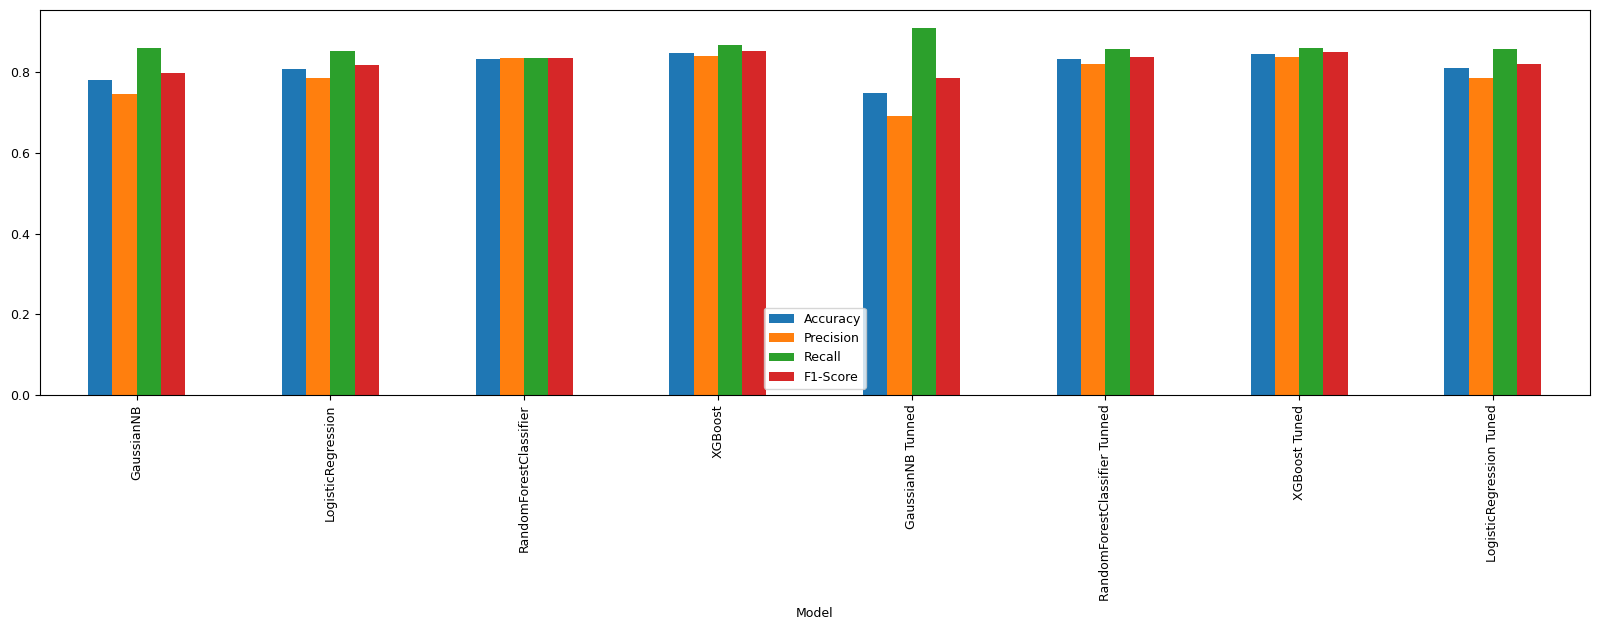

In [ ]:
df_metrix.plot(x="Model", y=['Accuracy','Precision','Recall','F1-Score'], kind="bar",figsize=(20, 5))